In [1]:
import os
from PIL import Image
import matplotlib.pyplot as plt
from fuzzywuzzy import fuzz
import re
import cv2
import numpy as np
from PIL import Image, ImageEnhance
from shapely.geometry import LineString, Polygon

from tqdm.notebook import tqdm

C:\Users\fhacesga\Anaconda3\envs\deeplearning\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
base_dir = r"C:\Users\fhacesga\Desktop\FIRMsDigitizing\RECTDNN\data\000_WorkingFiles\\"

known_dir = f"{base_dir}Known"
unknown_dir = f"{base_dir}Unknown"
computed_dir = f"{base_dir}Computed"
encoded_dir  = f"{base_dir}Encoded"

In [45]:
def preprocess(image):
    image = np.asarray(image) * 255
    image = image.astype(np.uint8)
    image = cv2.GaussianBlur(image, (5, 5), 0)
    _, image = cv2.threshold(image, 200, 255, cv2.THRESH_BINARY_INV)
    image = cv2.Canny(image, 100, 250).astype(np.uint8)
    image = cv2.dilate(image, np.ones((10, 10), np.uint8))
    return image

def save(image, name):
    Image.fromarray(image).save(name)
    
    
def getCenter(image):
    height, width = image.shape[:2]
    y_center = height // 2
    x_center = width // 2
    return y_center, x_center

def bomb_center(image, perc, replacement_value=0, ):
    height, width = image.shape[:2]
    
    y_center, x_center = getCenter(image)
    
    window_size_x = np.int32(width * perc)
    window_size_y = np.int32(height * perc)

    # Calculate the boundaries of the center window
    y_start = y_center - window_size_y // 2
    y_end = y_start + window_size_y
    x_start = x_center - window_size_x // 2
    x_end = x_start + window_size_x

    # Create a copy of the image array to avoid modifying the original array
    modified_image = np.copy(image)

    # Replace the values in the center window with the replacement value
    modified_image[y_start:y_end, x_start:x_end] = replacement_value

    return modified_image

def process_floodfill(image):
    # GET LINES    
    # https://stackoverflow.com/questions/45322630/how-to-detect-lines-in-opencv
    rho = 1  # distance resolution in pixels of the Hough grid
    theta = np.pi / 180  # angular resolution in radians of the Hough grid
    threshold = 5  # minimum number of votes (intersections in Hough grid cell)
    min_line_length = image.shape[0] // 4 # minimum number of pixels making up a line
    max_line_gap = 100 # maximum gap in pixels between connectable line segments
    line_image = np.copy(testimg) * 0  # creating a blank to draw lines on

    # Run Hough on edge detected image
    # Output "lines" is an array containing endpoints of detected line segments
    lines = cv2.HoughLinesP(image, rho, theta, threshold, np.array([]),
                        min_line_length, max_line_gap)

    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),5)
    
    # BOMB CENTER
    bombed = bomb_center(line_image, 0.5, replacement_value=0)
    y_center, x_center = getCenter(bombed)
    
    # GET FILLED
    _, _, filled, _ = cv2.floodFill(bombed, None, (x_center, y_center), 1)
    
    return filled, line_image

  0%|          | 0/50 [00:00<?, ?it/s]

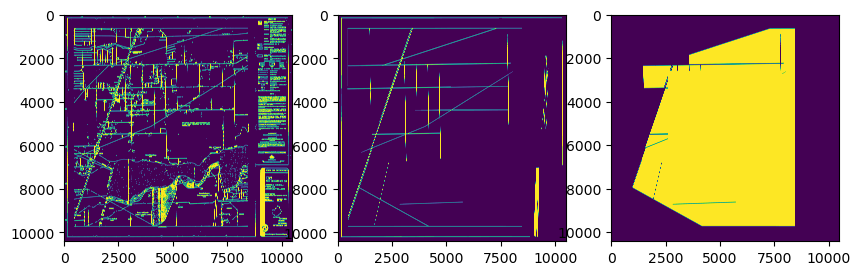

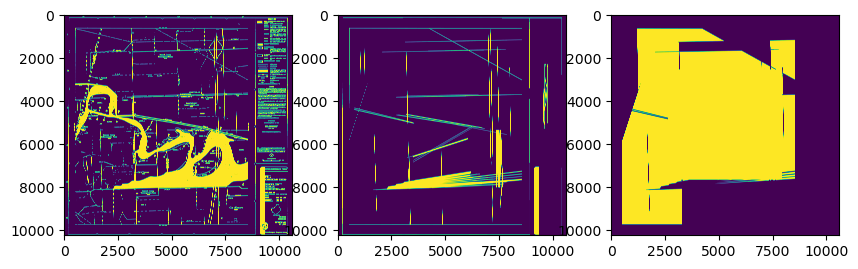

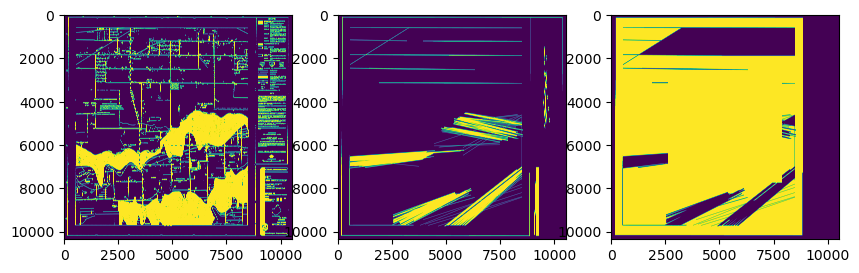

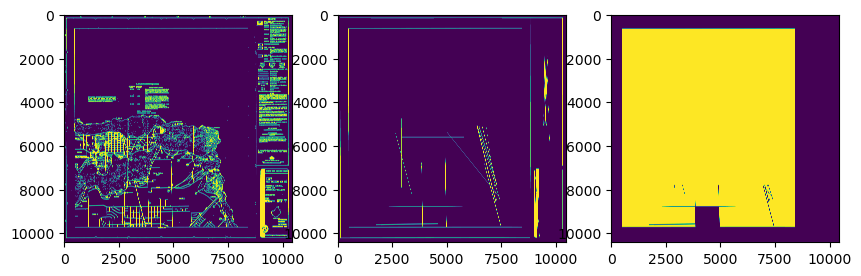

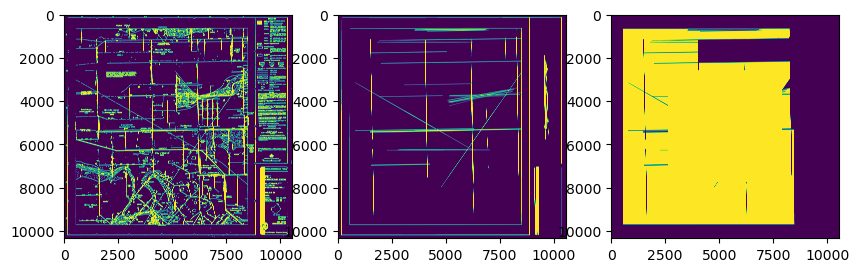

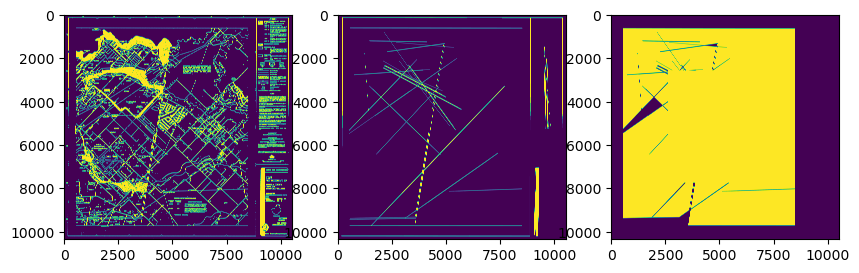

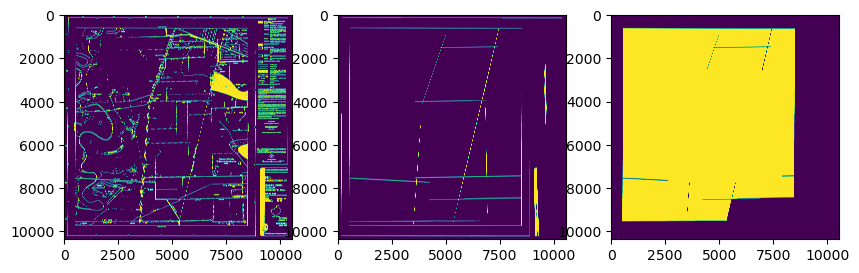

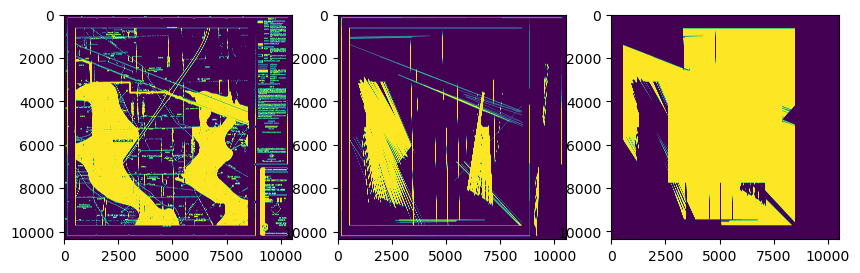

C:\Users\fhacesga\Anaconda3\envs\deeplearning\lib\site-packages\PIL\Image.py:3077: DecompressionBombWarning: Image size (122957175 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


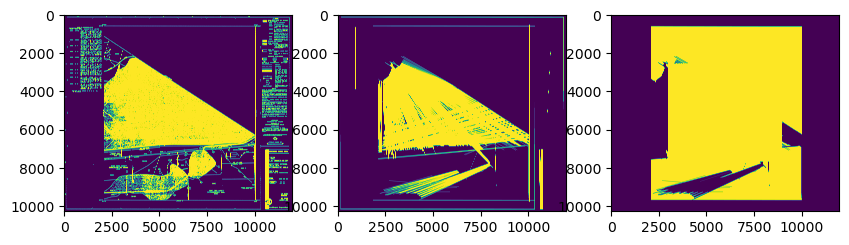

C:\Users\fhacesga\Anaconda3\envs\deeplearning\lib\site-packages\PIL\Image.py:3077: DecompressionBombWarning: Image size (121544500 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


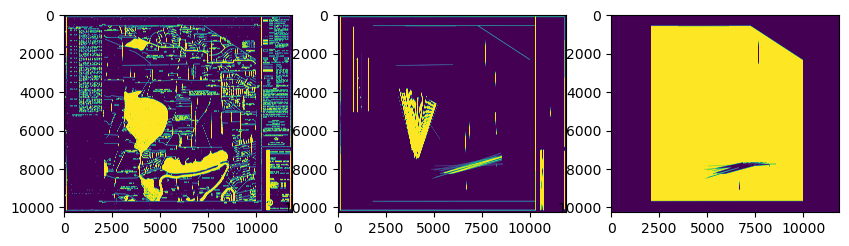

C:\Users\fhacesga\Anaconda3\envs\deeplearning\lib\site-packages\PIL\Image.py:3077: DecompressionBombWarning: Image size (123675174 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


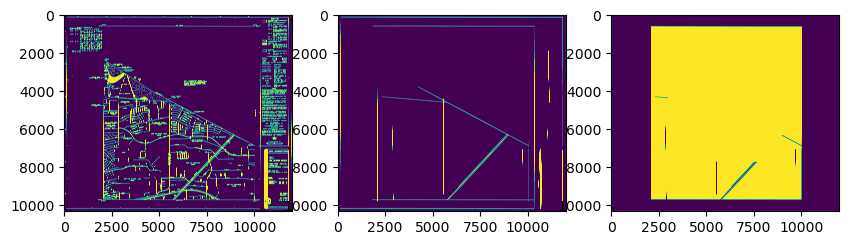

C:\Users\fhacesga\Anaconda3\envs\deeplearning\lib\site-packages\PIL\Image.py:3077: DecompressionBombWarning: Image size (121083300 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


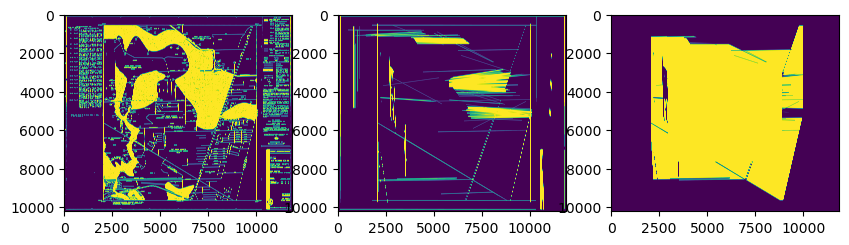

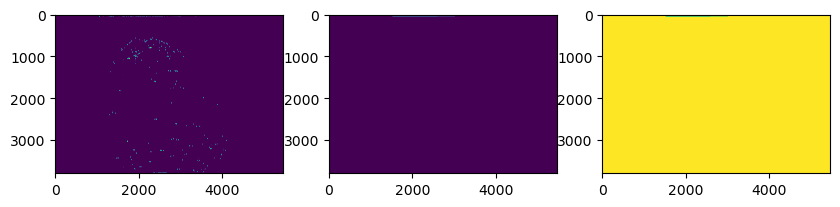

C:\Users\fhacesga\Anaconda3\envs\deeplearning\lib\site-packages\PIL\Image.py:3077: DecompressionBombWarning: Image size (151828480 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


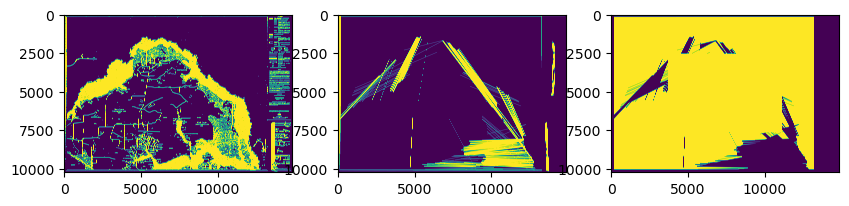

C:\Users\fhacesga\Anaconda3\envs\deeplearning\lib\site-packages\PIL\Image.py:3077: DecompressionBombWarning: Image size (106756000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


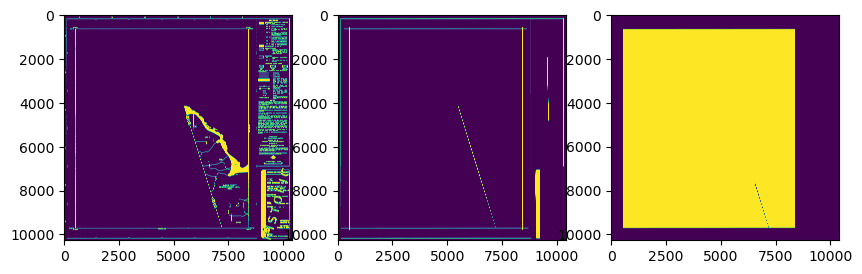

C:\Users\fhacesga\Anaconda3\envs\deeplearning\lib\site-packages\PIL\Image.py:3077: DecompressionBombWarning: Image size (151961600 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


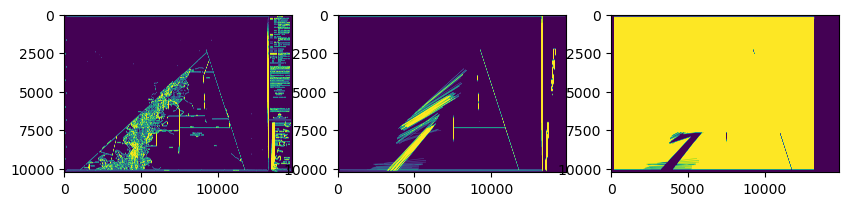

C:\Users\fhacesga\Anaconda3\envs\deeplearning\lib\site-packages\PIL\Image.py:3077: DecompressionBombWarning: Image size (106880160 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


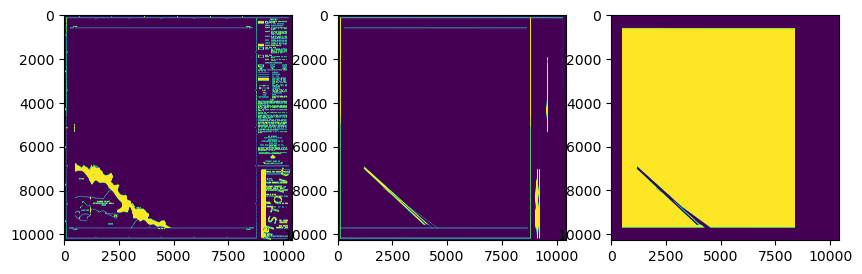

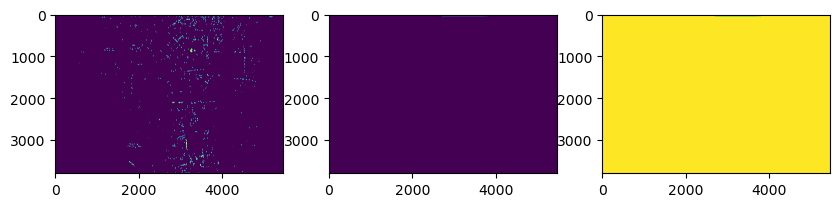

C:\Users\fhacesga\Anaconda3\envs\deeplearning\lib\site-packages\PIL\Image.py:3077: DecompressionBombWarning: Image size (151693689 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


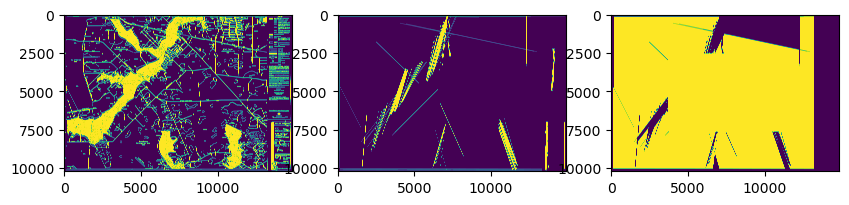

C:\Users\fhacesga\Anaconda3\envs\deeplearning\lib\site-packages\PIL\Image.py:3077: DecompressionBombWarning: Image size (106793334 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


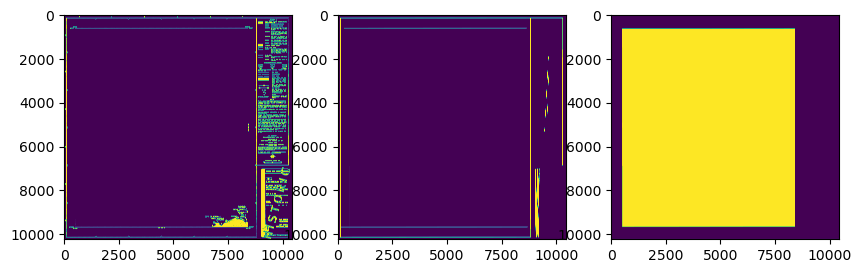

C:\Users\fhacesga\Anaconda3\envs\deeplearning\lib\site-packages\PIL\Image.py:3077: DecompressionBombWarning: Image size (151949460 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


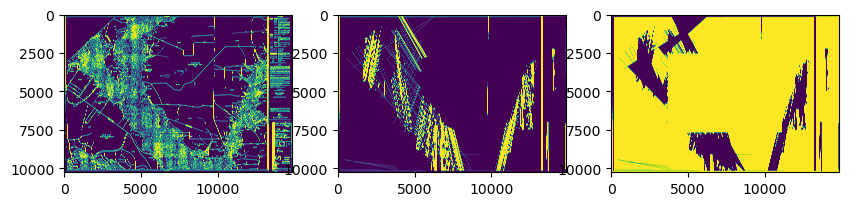

C:\Users\fhacesga\Anaconda3\envs\deeplearning\lib\site-packages\PIL\Image.py:3077: DecompressionBombWarning: Image size (122584791 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


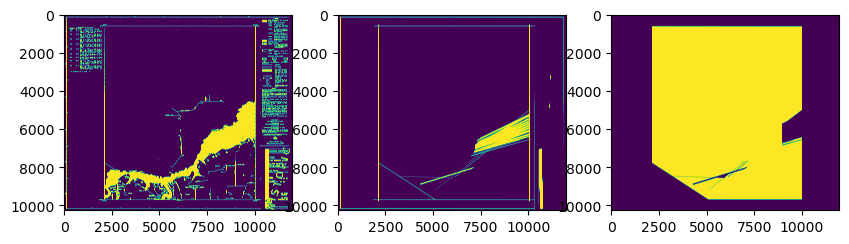

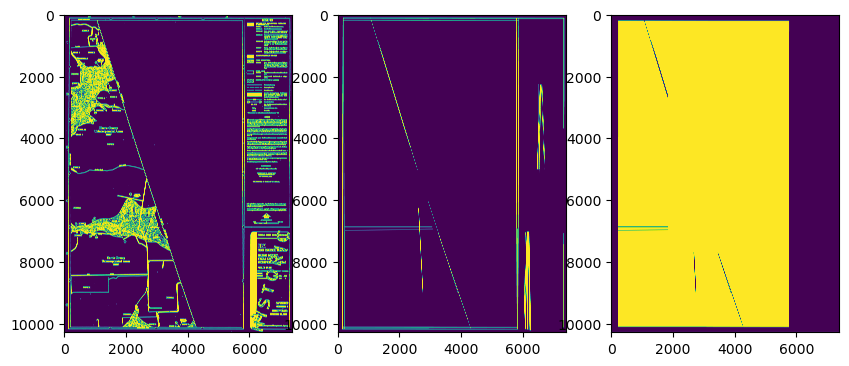

C:\Users\fhacesga\Anaconda3\envs\deeplearning\lib\site-packages\PIL\Image.py:3077: DecompressionBombWarning: Image size (107059626 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


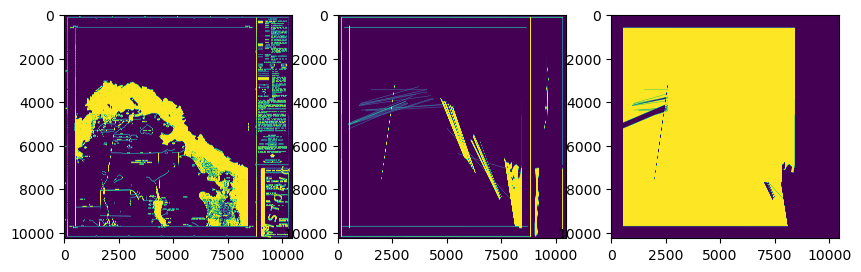

C:\Users\fhacesga\Anaconda3\envs\deeplearning\lib\site-packages\PIL\Image.py:3077: DecompressionBombWarning: Image size (151993751 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


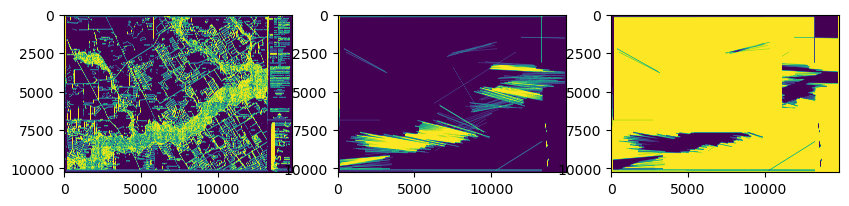

C:\Users\fhacesga\Anaconda3\envs\deeplearning\lib\site-packages\PIL\Image.py:3077: DecompressionBombWarning: Image size (106839450 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


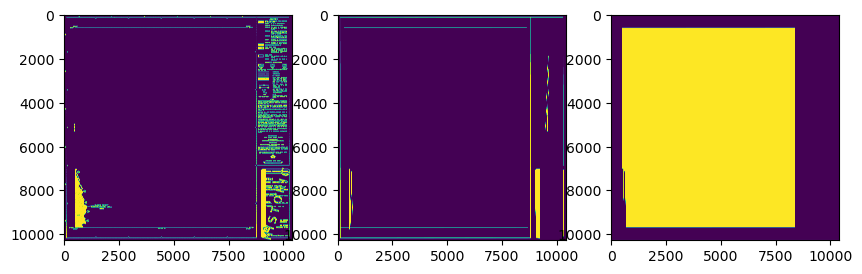

C:\Users\fhacesga\Anaconda3\envs\deeplearning\lib\site-packages\PIL\Image.py:3077: DecompressionBombWarning: Image size (151845720 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


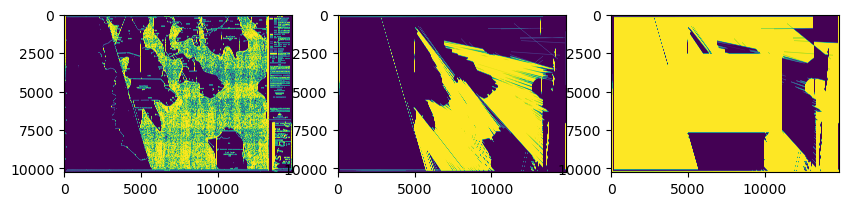

C:\Users\fhacesga\Anaconda3\envs\deeplearning\lib\site-packages\PIL\Image.py:3077: DecompressionBombWarning: Image size (106873452 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


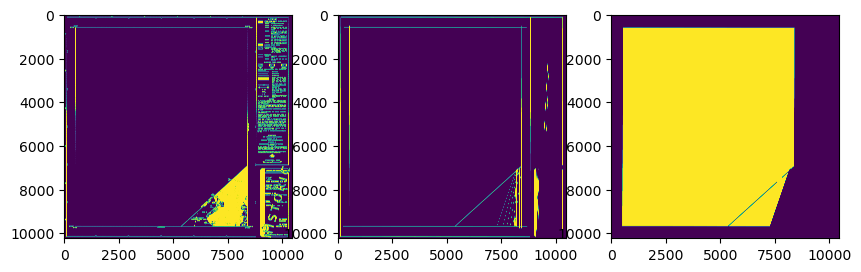

C:\Users\fhacesga\Anaconda3\envs\deeplearning\lib\site-packages\PIL\Image.py:3077: DecompressionBombWarning: Image size (152483240 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


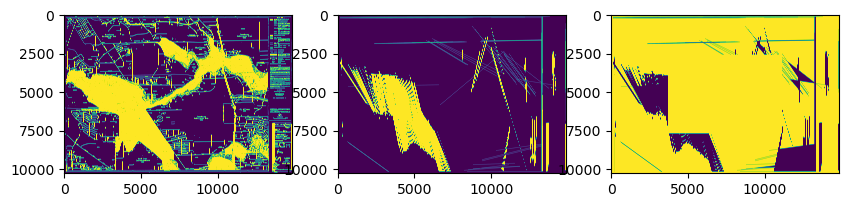

C:\Users\fhacesga\Anaconda3\envs\deeplearning\lib\site-packages\PIL\Image.py:3077: DecompressionBombWarning: Image size (122023356 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


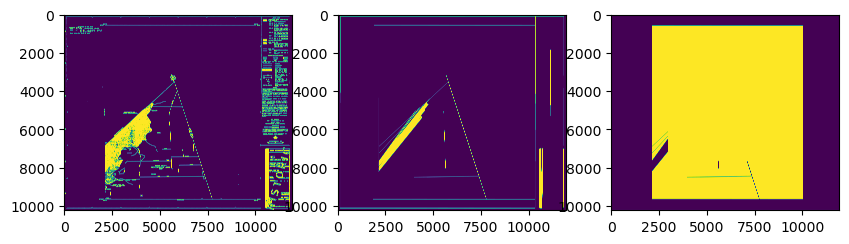

C:\Users\fhacesga\Anaconda3\envs\deeplearning\lib\site-packages\PIL\Image.py:3077: DecompressionBombWarning: Image size (152342149 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


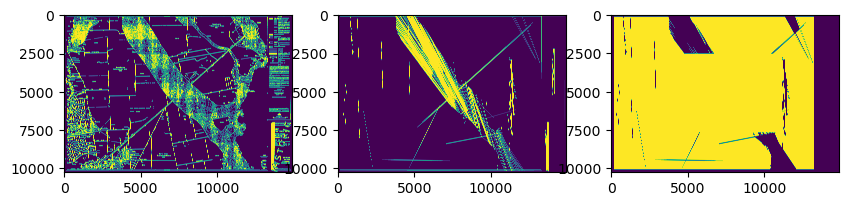

C:\Users\fhacesga\Anaconda3\envs\deeplearning\lib\site-packages\PIL\Image.py:3077: DecompressionBombWarning: Image size (123701160 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


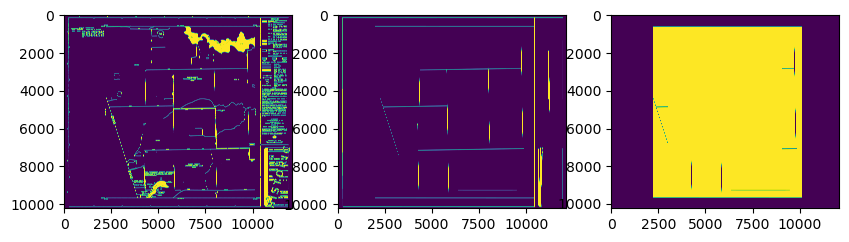

C:\Users\fhacesga\Anaconda3\envs\deeplearning\lib\site-packages\PIL\Image.py:3077: DecompressionBombWarning: Image size (152216038 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


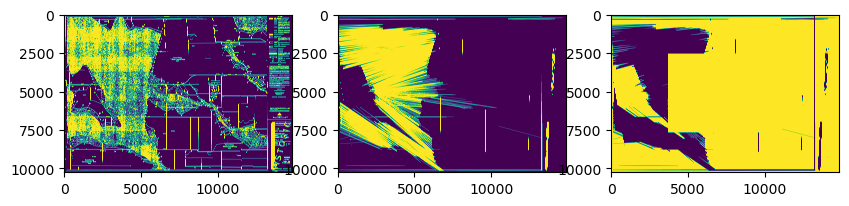

C:\Users\fhacesga\Anaconda3\envs\deeplearning\lib\site-packages\PIL\Image.py:3077: DecompressionBombWarning: Image size (120639834 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


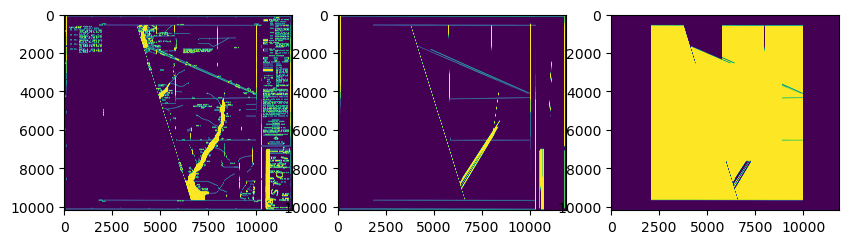

C:\Users\fhacesga\Anaconda3\envs\deeplearning\lib\site-packages\PIL\Image.py:3077: DecompressionBombWarning: Image size (152166400 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


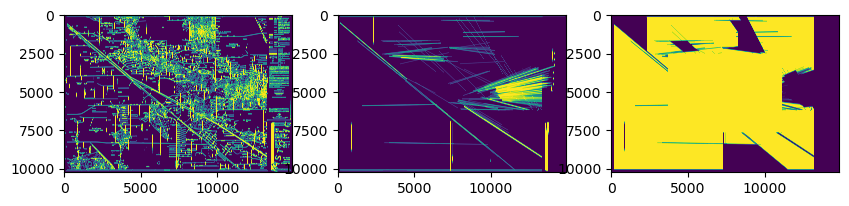

C:\Users\fhacesga\Anaconda3\envs\deeplearning\lib\site-packages\PIL\Image.py:3077: DecompressionBombWarning: Image size (105919806 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


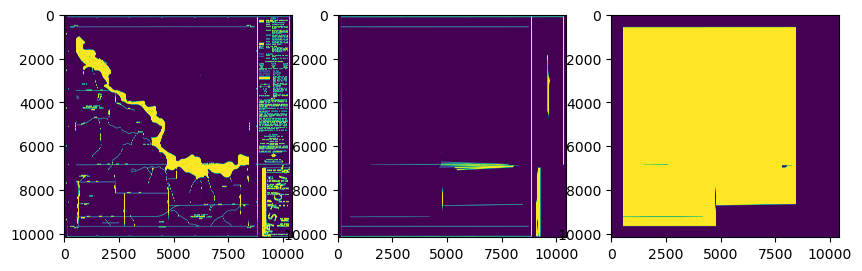

C:\Users\fhacesga\Anaconda3\envs\deeplearning\lib\site-packages\PIL\Image.py:3077: DecompressionBombWarning: Image size (152137209 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


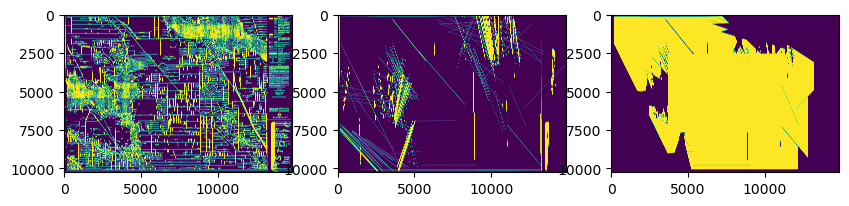

C:\Users\fhacesga\Anaconda3\envs\deeplearning\lib\site-packages\PIL\Image.py:3077: DecompressionBombWarning: Image size (106227849 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


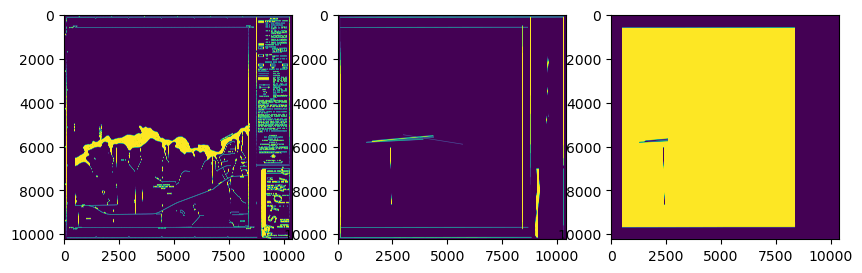

C:\Users\fhacesga\Anaconda3\envs\deeplearning\lib\site-packages\PIL\Image.py:3077: DecompressionBombWarning: Image size (152298062 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


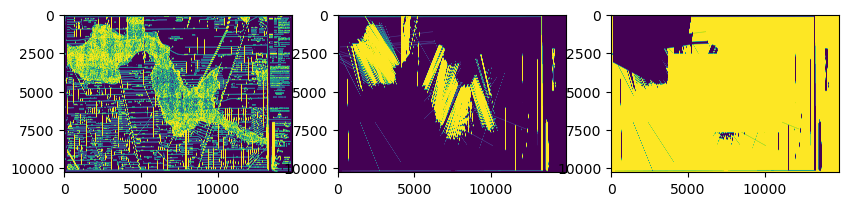

C:\Users\fhacesga\Anaconda3\envs\deeplearning\lib\site-packages\PIL\Image.py:3077: DecompressionBombWarning: Image size (120597450 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


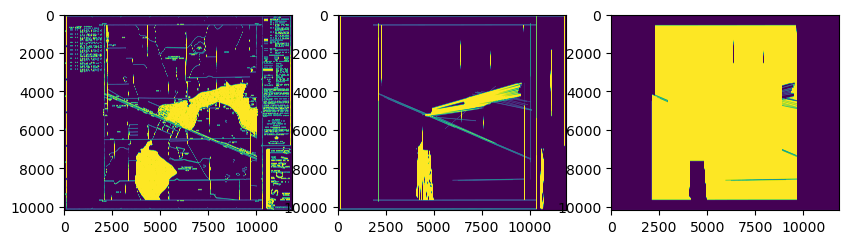

C:\Users\fhacesga\Anaconda3\envs\deeplearning\lib\site-packages\PIL\Image.py:3077: DecompressionBombWarning: Image size (155100176 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


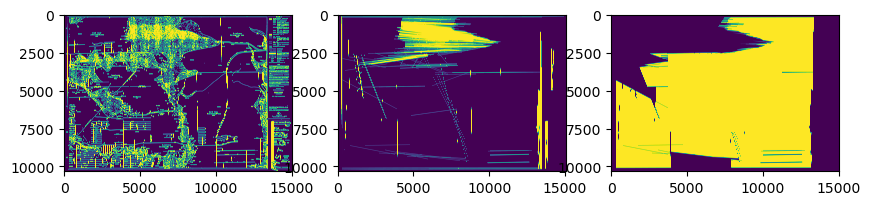

C:\Users\fhacesga\Anaconda3\envs\deeplearning\lib\site-packages\PIL\Image.py:3077: DecompressionBombWarning: Image size (120814305 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


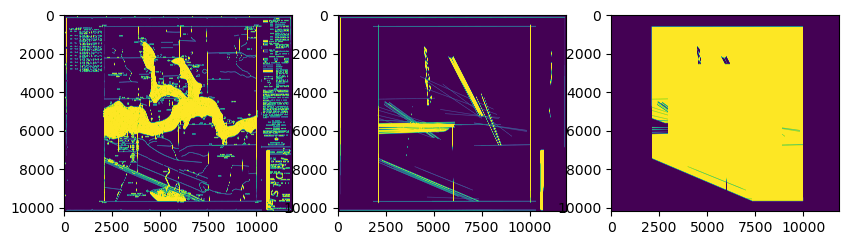

C:\Users\fhacesga\Anaconda3\envs\deeplearning\lib\site-packages\PIL\Image.py:3077: DecompressionBombWarning: Image size (152686218 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


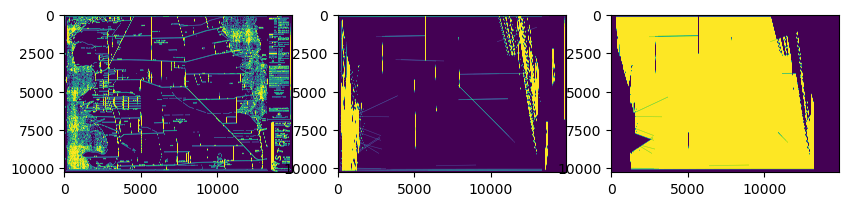

C:\Users\fhacesga\Anaconda3\envs\deeplearning\lib\site-packages\PIL\Image.py:3077: DecompressionBombWarning: Image size (122033184 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


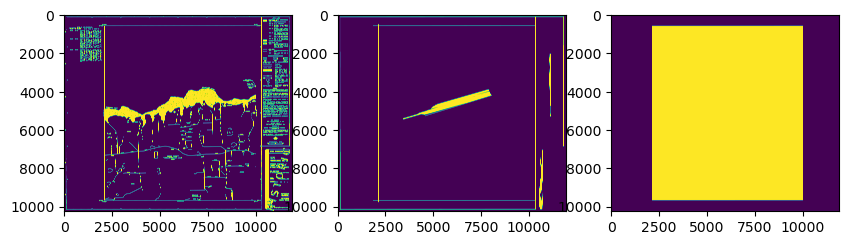

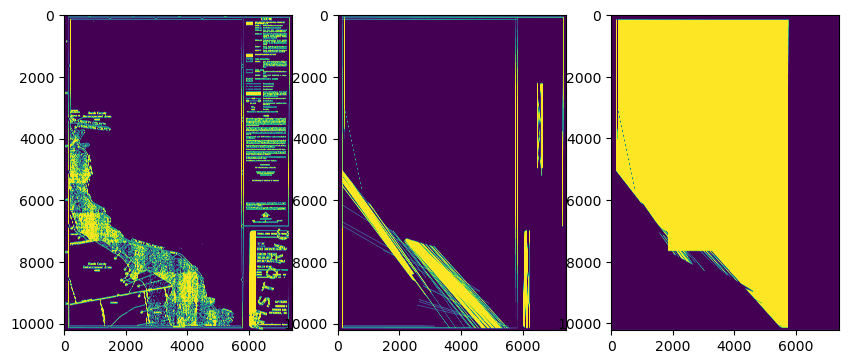

C:\Users\fhacesga\Anaconda3\envs\deeplearning\lib\site-packages\PIL\Image.py:3077: DecompressionBombWarning: Image size (120642704 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


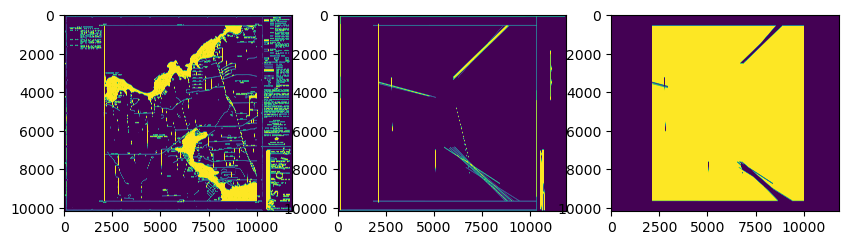

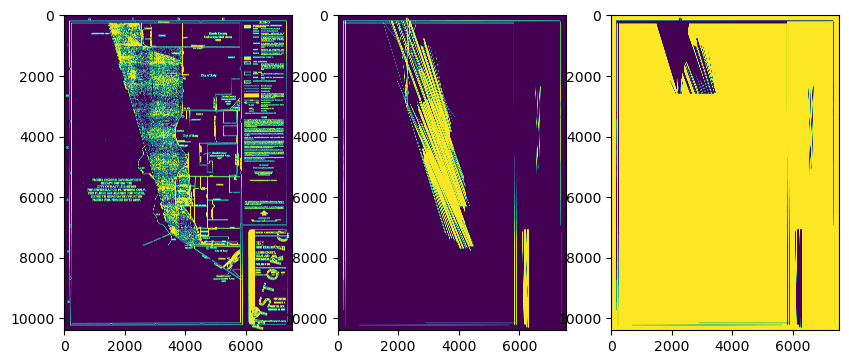

C:\Users\fhacesga\Anaconda3\envs\deeplearning\lib\site-packages\PIL\Image.py:3077: DecompressionBombWarning: Image size (121040320 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


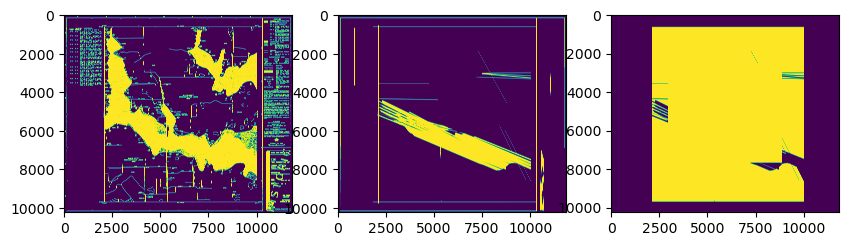

C:\Users\fhacesga\Anaconda3\envs\deeplearning\lib\site-packages\PIL\Image.py:3077: DecompressionBombWarning: Image size (151768680 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


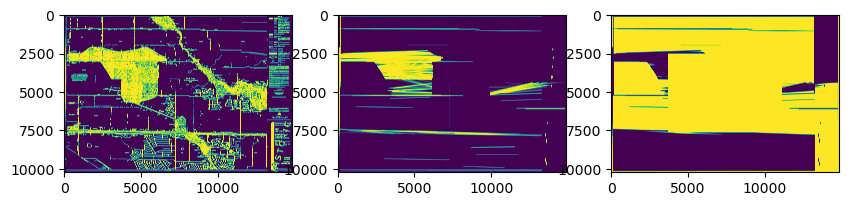

C:\Users\fhacesga\Anaconda3\envs\deeplearning\lib\site-packages\PIL\Image.py:3077: DecompressionBombWarning: Image size (120377367 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


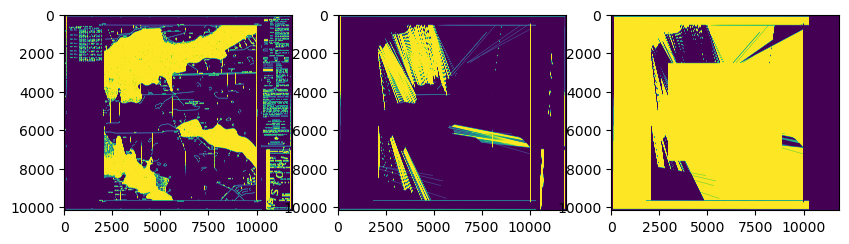

In [46]:
# Set the path to the folder containing the images
folder_path = computed_dir

# Get a list of image files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith((".png", ".jpg", ".jpeg", ".tif"))]

# Loop through each image file
for image_file in tqdm(image_files[:50]):
    
    fig, axs = plt.subplots(1, 3, figsize=(10, 5))
    
    testimg = Image.open(folder_path + "\\" + image_file)

    testimage_prep = preprocess(testimg)
    #axs[0].imshow(testimage_prep, cmap="Greys", vmin=0, vmax=255)

    testimage_out, lines = process_floodfill(testimage_prep)
    
    save(testimage_prep, "in.png")
    save(lines, "lines.png")
    save(testimage_out, "test.png")
    
    axs[0].imshow(testimage_prep)
    axs[1].imshow(lines)
    axs[2].imshow(testimage_out)
    
    plt.show()